In [1]:
import acquire as a

In [2]:
df = a.acquire_data()

## Preparation work

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# made column names pythonic
df.columns = [
    col.lower().replace(' ','_') for col in df.columns
]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Why is there NaN values for customerid? is there a match for customer id and country?

In [7]:
rows_with_null = df[df.isna().any(axis=1)]
rows_with_null

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [8]:
columns_with_nulls = df.columns[df.isna().any(axis=0)]

In [9]:
columns_with_nulls

Index(['description', 'customerid'], dtype='object')

In [10]:
# Select rows where any of the specified columns have null values
rows_with_nulls = df[df[columns_with_nulls].isnull().any(axis=1)]

print("Rows with null values in specified columns:")
rows_with_nulls

Rows with null values in specified columns:


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


## Customerids aren't unique to each country in the dataset

In [11]:
df[['customerid','country']].value_counts()

customerid  country       
17841.0     United Kingdom    7983
14911.0     EIRE              5903
14096.0     United Kingdom    5128
12748.0     United Kingdom    4642
14606.0     United Kingdom    2782
                              ... 
14351.0     United Kingdom       1
15562.0     United Kingdom       1
17065.0     United Kingdom       1
15070.0     United Kingdom       1
14090.0     United Kingdom       1
Name: count, Length: 4380, dtype: int64

In [12]:
country_cnts = df.country.value_counts()

In [13]:
country_cnts = pd.DataFrame(country_cnts).reset_index()

In [14]:
country_cnts = country_cnts[country_cnts['count'] > 1000]

In [15]:
# plt.figure(figsize=(12, 8))

# sns.barplot(data=country_cnts, x='count', y='country', palette='bright')
# plt.title('Country Distribution')
# plt.ylabel('Country', rotation=0)
# plt.tight_layout()
# plt.show()

/var/folders/hz/r10rvhgs41x5bxdmg79hksdw0000gn/T/ipykernel_40556/3697237330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')
/var/folders/hz/r10rvhgs41x5bxdmg79hksdw0000gn/T/ipykernel_40556/3697237330.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])


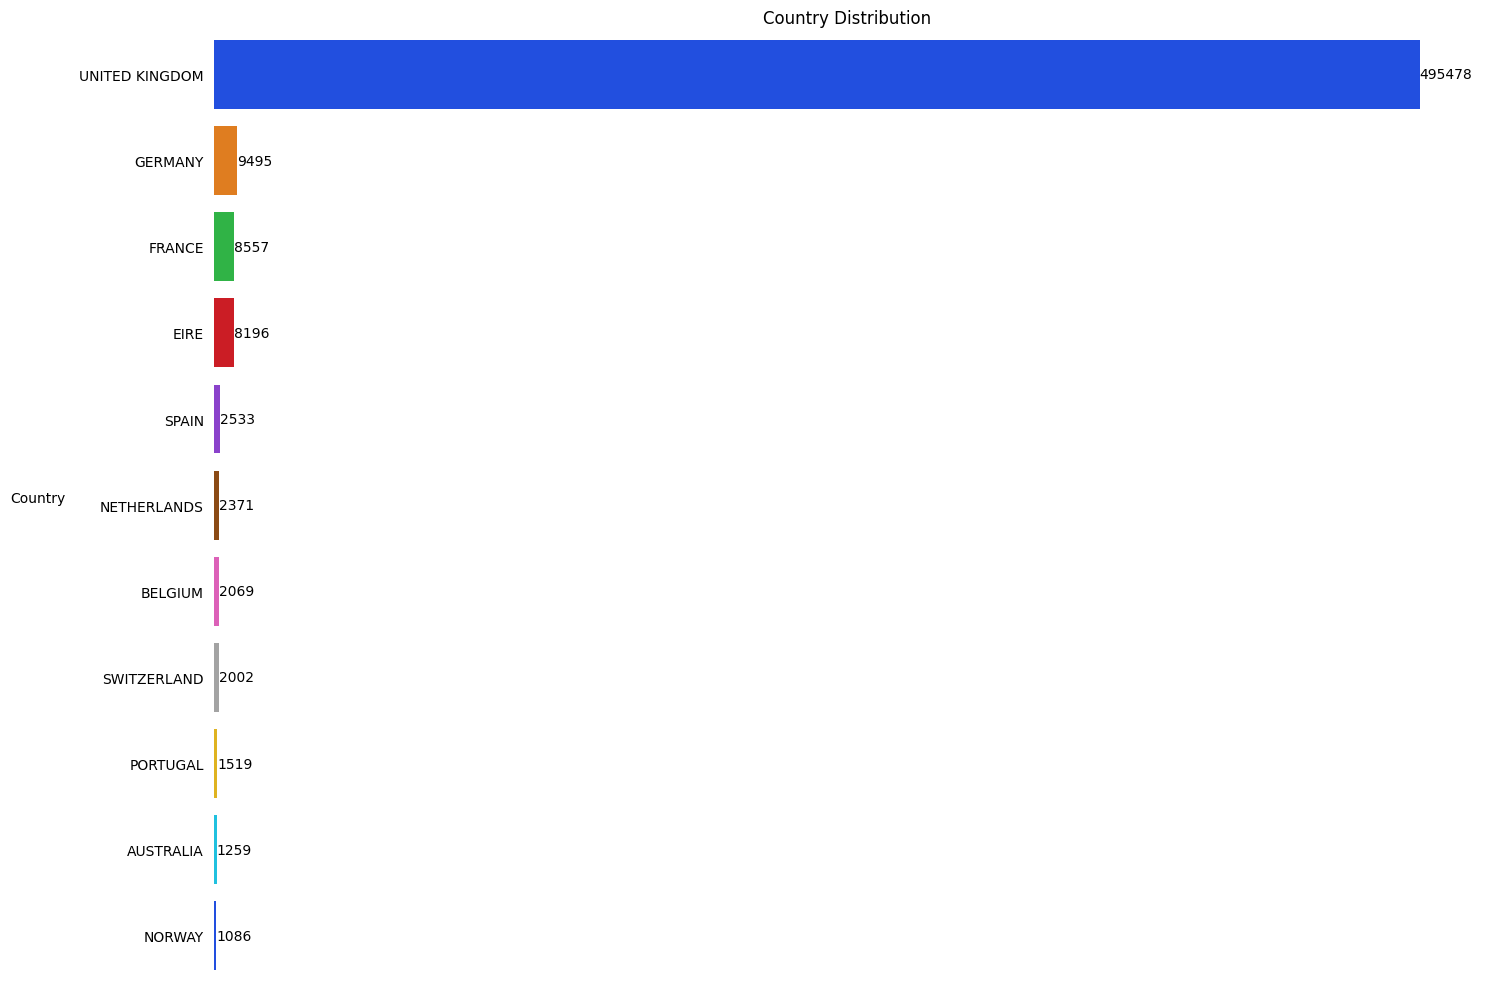

In [16]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

# Based on this visual we can see that all countries that appear over 1000X within this dataset

# what are the distributions that exist in this dataset?

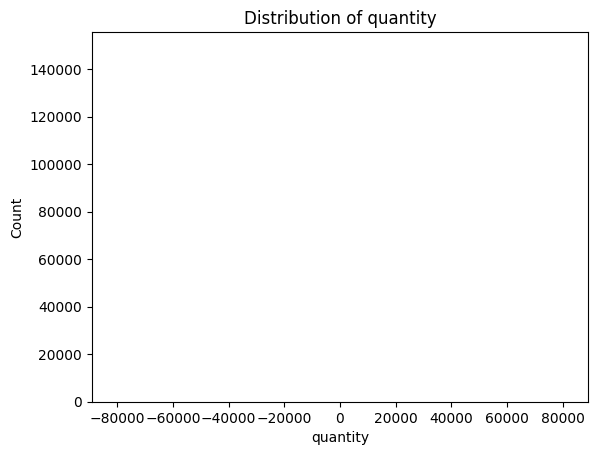

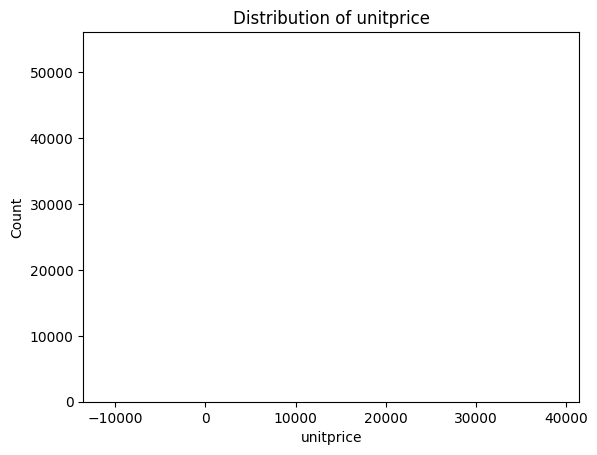

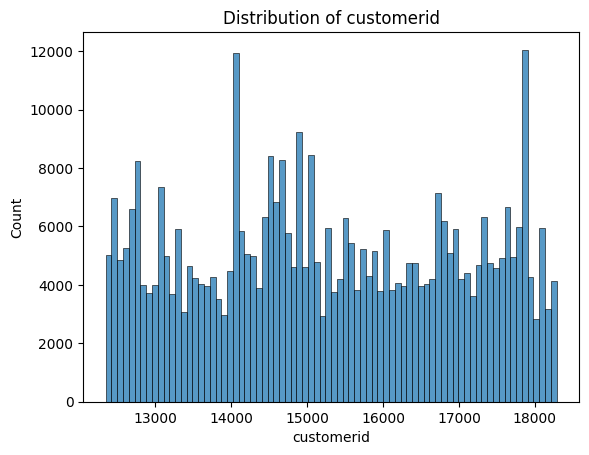

In [31]:
numeric_cols = df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]

# Create histograms for selected columns
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

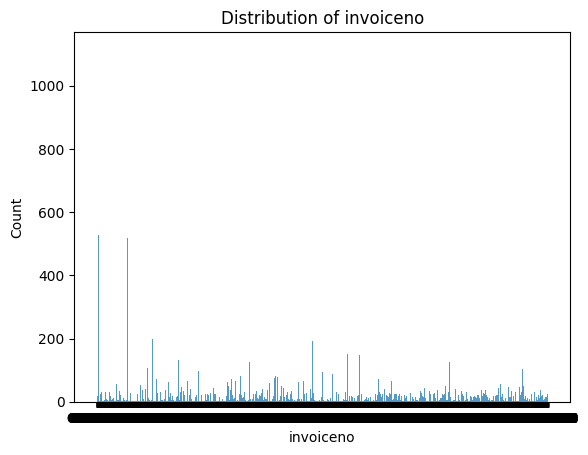

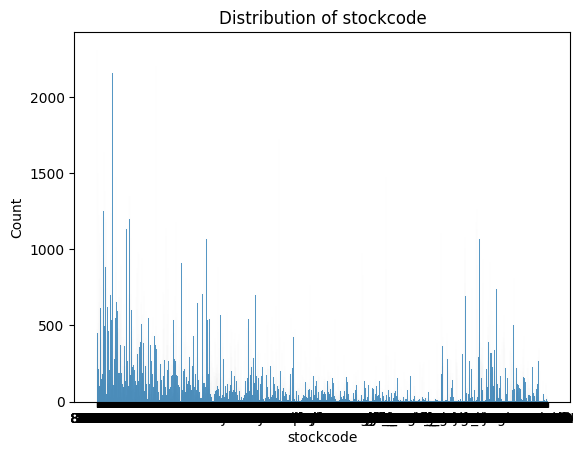

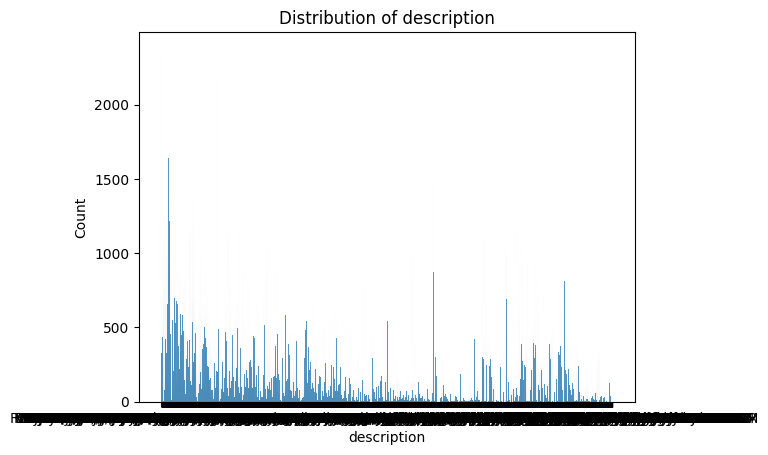

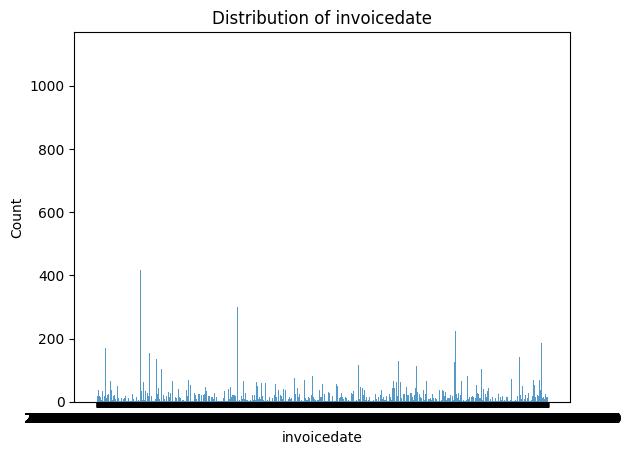

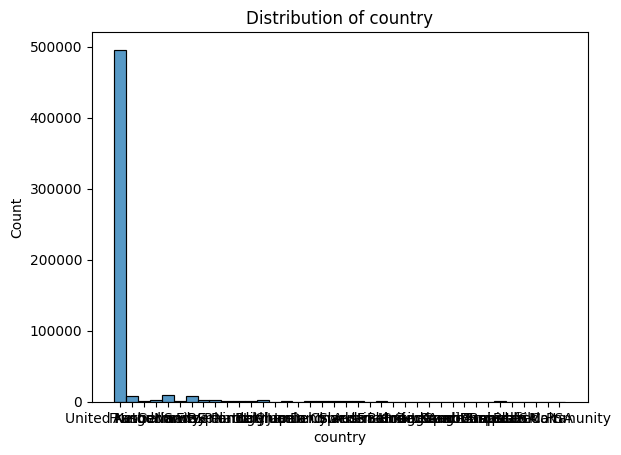

In [62]:
for col in df.columns[df.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

# the number of na values is 135080, is it worth trying to salvage this data?

In [17]:
541540 - 135808

405732

## This is 25% of the dataset

## what patterns or reasons are there for this missing data?, is there a way to impute or fill this with other info or infered based on context?

In [18]:
rows_with_nulls.country.value_counts()

country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: count, dtype: int64

In [19]:
rows_nouk_nulls = rows_with_nulls[rows_with_nulls.country != 'United Kingdom']
rows_nouk_nulls

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
6353,536885,21832,CHOCOLATE CALCULATOR,24,2010-12-03 11:42:00,1.65,NaN,EIRE
6354,536885,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,2010-12-03 11:42:00,6.75,NaN,EIRE
6355,536885,48184,DOORMAT ENGLISH ROSE,10,2010-12-03 11:42:00,6.75,NaN,EIRE
6356,536885,22837,HOT WATER BOTTLE BABUSHKA,24,2010-12-03 11:42:00,4.65,NaN,EIRE
6357,536885,22632,HAND WARMER RED RETROSPOT,12,2010-12-03 11:42:00,2.10,NaN,EIRE
...,...,...,...,...,...,...,...,...
518850,580124,23212,HEART WREATH DECORATION WITH BELL,12,2011-12-01 17:12:00,1.25,NaN,EIRE
518851,580124,23311,VINTAGE CHRISTMAS STOCKING,6,2011-12-01 17:12:00,2.55,NaN,EIRE
518852,580124,23312,VINTAGE CHRISTMAS GIFT SACK,8,2011-12-01 17:12:00,4.15,NaN,EIRE
518853,580124,22834,HAND WARMER BABUSHKA DESIGN,24,2011-12-01 17:12:00,2.10,NaN,EIRE


## I don't think we need unspecified countries.

In [20]:
rows_nouk_nulls.country.value_counts()

country
EIRE           711
Hong Kong      288
Unspecified    202
Switzerland    125
France          66
Israel          47
Portugal        39
Bahrain          2
Name: count, dtype: int64

## how do unique values help here?

In [21]:
rows_nouk_nulls.nunique()

invoiceno       73
stockcode      735
description    742
quantity        50
invoicedate     73
unitprice       73
customerid       0
country          8
dtype: int64

## UK is comprised of so many nulls
- would it add value to the data evaluation if there are observations with a unit price of 0.0?

In [22]:
zero_unitprice_rows = rows_with_nulls.loc[rows_with_nulls['description'].isnull() & (rows_with_nulls['unitprice'] == 0.0)]
print(zero_unitprice_rows.country.value_counts())
zero_unitprice_rows

country
United Kingdom    1454
Name: count, dtype: int64


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


## checking quantity and customer_ids

In [23]:
quanitity_custid_rows = rows_with_nulls.loc[rows_with_nulls['customerid'].isnull() & (rows_with_nulls['quantity'] == 1)]
print(quanitity_custid_rows.country.value_counts())
quanitity_custid_rows

country
United Kingdom    74761
Switzerland          46
Unspecified          42
France               30
EIRE                 18
Portugal              9
Hong Kong             6
Israel                1
Name: count, dtype: int64


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1454,536544,21811,CHRISTMAS HANGING HEART WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1455,536544,21821,GLITTER STAR GARLAND WITH BELLS,1,2010-12-01 14:32:00,7.62,NaN,United Kingdom
1456,536544,21822,GLITTER CHRISTMAS TREE WITH BELLS,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541532,581498,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541533,581498,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-12-09 10:26:00,16.63,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [28]:
zero_unitprice_rows = rows_with_nulls.loc[rows_with_nulls['customerid'].isnull() & (rows_with_nulls['quantity'] >= 100)]
print(zero_unitprice_rows.country.value_counts())
zero_unitprice_rows

country
United Kingdom    13
Name: count, dtype: int64


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
74615,542505,79063D,NaN,2560,2011-01-28 12:04:00,0.00,NaN,United Kingdom
82795,543258,84611B,NaN,1287,2011-02-04 16:06:00,0.00,NaN,United Kingdom
115807,546139,84988,?,3000,2011-03-09 16:35:00,0.00,NaN,United Kingdom
136537,547966,DOT,NaN,1000,2011-03-28 15:49:00,0.00,NaN,United Kingdom
160541,550460,47556B,did a credit and did not tick ret,1300,2011-04-18 13:18:00,0.00,NaN,United Kingdom
203751,554550,47566B,incorrectly credited C550456 see 47,1300,2011-05-25 09:57:00,0.00,NaN,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,NaN,United Kingdom
263885,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.00,NaN,United Kingdom


In [ ]:
rows_with_nulls.description.value_counts()

In [ ]:
rows_with_nulls.description.to_list